In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle
from xgboost import plot_tree


In [2]:
# #############################################################################
# Load data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 10))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit XGB regression model
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model, {'max_depth': [1, 2, 4, 6, 8], 'n_estimators': [ 50, 100, 110, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.9997188045264701
{'max_depth': 6, 'n_estimators': 110}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished


In [5]:
prediction = clf.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.592078,0.588406
1,0.500662,0.507530
2,0.301197,0.301812
3,0.209630,0.208368
4,0.112262,0.115477
5,0.948188,0.950289
6,0.123777,0.126740
7,0.368485,0.363945
8,0.659974,0.661111
9,0.227223,0.226088


Text(0, 0.5, 'Predicted Y')

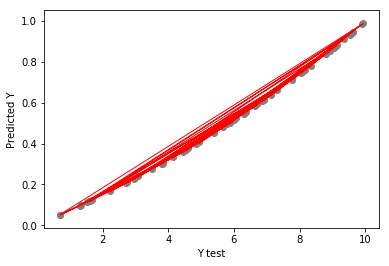

In [6]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=1)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 0.0020132226024814756
MSE: 7.518308705110845e-06
RMSE: 0.0027419534469262682


In [8]:
# save the model to disk
filename = '../models/XGB_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
clf.predict([[0]])

array([0.00178787], dtype=float32)